In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1
from numpy.fft import fftshift, ifftshift, ifft2

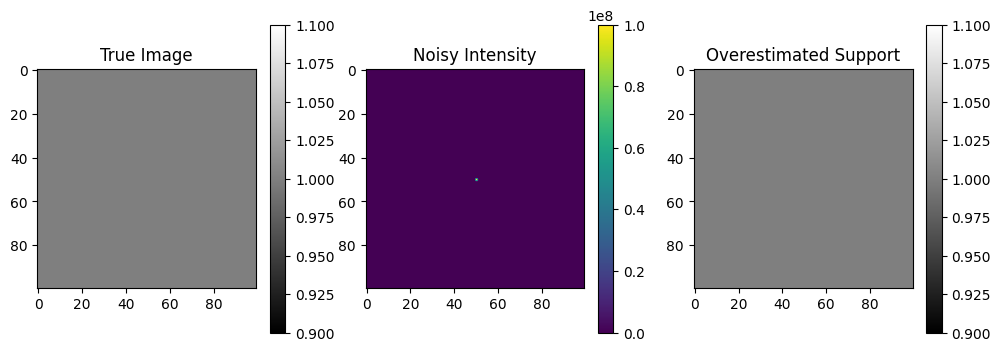

In [6]:
# Define the true signal (support)
n = 100
true_support = np.zeros((n, n))
radius = 200
x, y = np.ogrid[-n//2:n//2, -n//2:n//2]
mask = x**2 + y**2 <= radius**2
true_support[mask] = 1

# True image within the support
#true_image = np.random.rand(n, n) * true_support
true_image = true_support

# Compute the Fourier transform and intensity measurements
true_ft = np.fft.fftshift(np.fft.fft2(true_image))
true_intensity = np.abs(true_ft)**2

# Add strong noise to the intensity measurements
noise_level = 1.0
noisy_intensity = true_intensity + noise_level * np.max(true_intensity) * np.random.randn(n, n)

# Example of overestimated support
overestimated_support = np.ones((n, n))

# Plot the true image, noisy intensity, and overestimated support
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('True Image')
plt.imshow(true_image, cmap='gray')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('Noisy Intensity')
plt.imshow(true_intensity, cmap='viridis')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('Overestimated Support')
plt.imshow(overestimated_support, cmap='gray')
plt.colorbar()

plt.show()


### Be careful! FFT does not give the analytical integral. 
One needs to further multiply by the cell size $\Delta x \Delta y$, equal to $2*2 / 2^{5} *  2^{5} = 2^{-8}$ in the case of the unit rectangle discretized $2^{5} = 32 $ by  $2^{5} = 32 $.

Only then, can one start justifying non-zero values in the imaginary part of its FT, up to some finite numerical precision or sampling grid asymmetry artifacts which can introduce a phase shift.

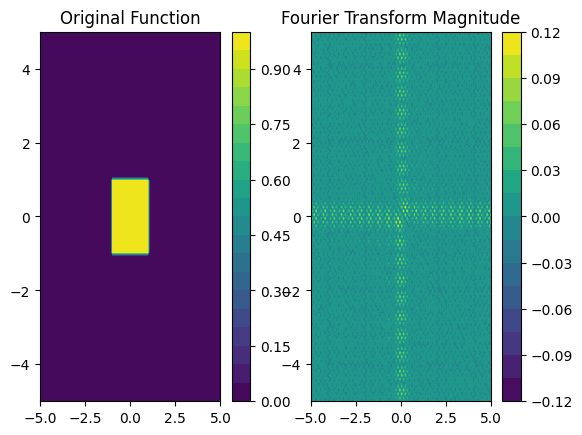

In [10]:
# Define the 2D function
def f(x, y):
    return (np.abs(x)<1) & (np.abs(y)<1)

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Compute the 2D Fourier transform
F = 2**(-8) * np.fft.fft2(Z)
F_shifted = np.fft.fftshift(F)  # Shift the zero-frequency component to the center
magnitude = np.abs(F_shifted)

# Plot the original function
plt.subplot(1, 2, 1)
plt.title('Original Function')
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar()

# Plot the magnitude of the Fourier transform
plt.subplot(1, 2, 2)
plt.title('Fourier Transform Magnitude')
plt.contourf(x, y, F_shifted.imag, levels=20, cmap='viridis')
plt.colorbar()

plt.show()


In [128]:
from SetUpImage import setUpImage
half_Nx, half_Ny = 64, 64 #half image shape
Nx, Ny = 2 * half_Nx + 1,  2 * half_Ny + 1 #image shape
rx, ry = 1, 1 #for oversampling
n = Nx * Ny #image size

# object support
Kx = (half_Nx)//2 #any natural integer between 0 (object is a single point) and half_Nx (object fills up the full image).  
Ky = (half_Ny)//2 #any natural integer between 0 (object is a single point) and half_Nx (object fills up the full image).

# mask support
tx = 0.05 #parameter between 0 (very precise) and 1(no support knowledge) # 0.35  failed already
ty = 0.05 #parameter between 0 (very precise) and 1(no support knowledge)  

#true_images = setUpImage(Nx, Ny)
s = setUpImage(Nx, Ny, Kx, Ky, tx, ty)

true_images, mask = s()

### TV regularization

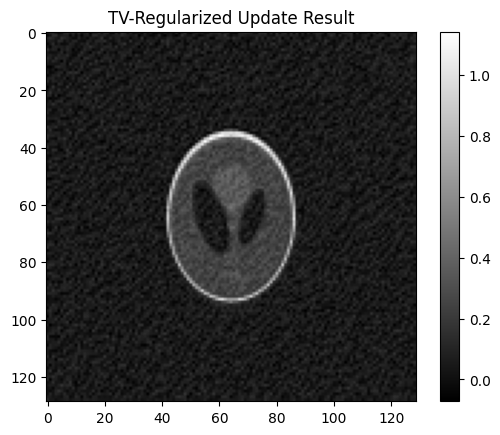

In [138]:


def tv_gradient(u):
    """Calcul du gradient de la régularisation TV."""
    grad_u = np.gradient(u)
    norm_grad_u = np.sqrt(grad_u[0]**2 + grad_u[1]**2)
    norm_grad_u[norm_grad_u == 0] = 1  # Pour éviter la division par zéro
    grad_tv_x = grad_u[0] / norm_grad_u
    grad_tv_y = grad_u[1] / norm_grad_u
    grad_tv = np.array([grad_tv_x, grad_tv_y])
    return grad_tv

def tv_regularization_update(u, functional, num_iterations, reg_param, learning_rate=0.1):
    """Mise à jour de la régularisation TV."""
    for _ in range(num_iterations):
        grad = np.gradient(functional(u))  # Gradient du fonctionnel à minimiser
        grad_tv = tv_gradient(u)           # Gradient de la régularisation TV
        u = u - learning_rate * (grad + reg_param * grad_tv.sum(axis=0))  # Mise à jour
    return u

# Exemple d'utilisation
initial_vector = true_images[2] + 0.1 * np.random.rand(129, 129)  # Exemple de vecteur initial
num_iterations = 5                        # Nombre d'itérations
reg_param = 0.3                            # Paramètre de régularisation

def example_functional(u):
    """Exemple de fonctionnelle à minimiser."""
    return 0 * (u - 0.5)**2  # Fonctionnelle simple pour l'exemple

# Calcul de la mise à jour régularisée par TV

result = tv_regularization_update(initial_vector, example_functional, num_iterations, reg_param)
slices = [0] * num_iterations + [slice(None), slice(None)]
im = result[tuple(slices)]

# Affichage du résultat (si nécessaire)
import matplotlib.pyplot as plt
plt.imshow(im.real, cmap='gray')
plt.colorbar()
plt.title('TV-Regularized Update Result')
plt.show()


In [90]:
x = np.random.poisson(lam = 1, size = 10)
np.linalg.norm (x)


4.0

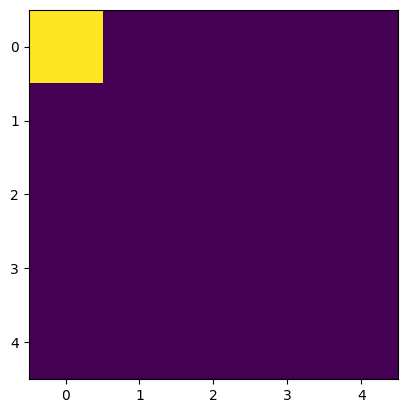

In [49]:
x = np.array([[1, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])
X = np.abs(np.fft.fft2(x))
#t = X.fftfe
y = np.fft.ifftshift(x)
plt.imshow(x)
#plt.colorbar(im)

Text(0, 0.5, 'y')

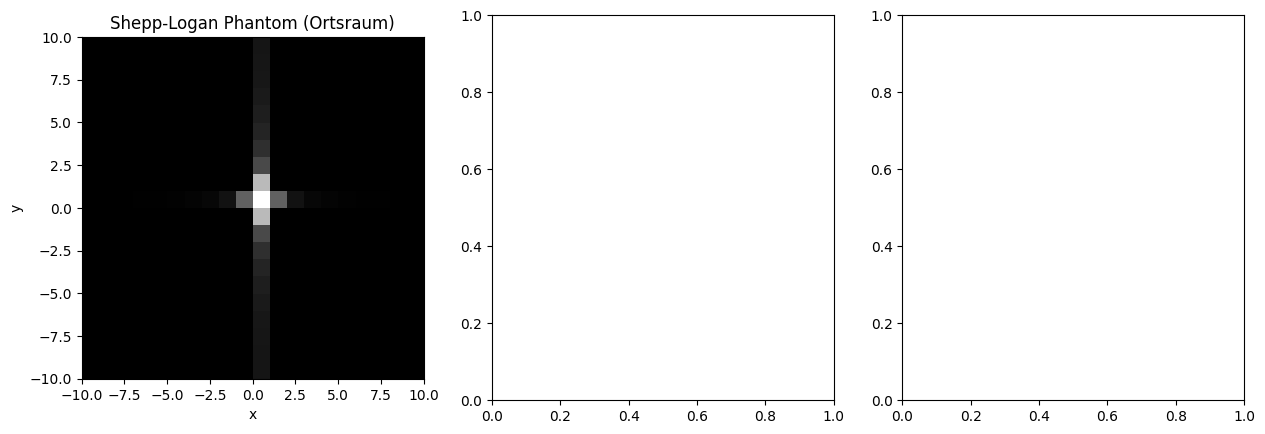

In [25]:
import matplotlib.pyplot as plt
x = np.linspace(0, np.pi, 20)
y = np.linspace(0, np.pi, 20)
[X, Y] = np.meshgrid(x,
                     y)
S = np.sin(X) + np.cos(Y) #+ np.random.uniform(0, 1, X.shape)
FS = np.fft.fftn(S)
# Plotten
fig, ax = plt.subplots(1,3,figsize=(15,5))

# Frequenzraum
K = 20
kmax = 10.0
kx = np.linspace(-kmax, kmax, K)
ky = np.linspace(-kmax, kmax, K)
KX, KY = np.meshgrid(kx, ky)

ax[0].imshow(np.abs(np.fft.fftshift(FS)), extent=[kx[0], kx[-1], ky[0], ky[-1]],  cmap='gray', origin='lower')
ax[0].set_title("Shepp-Logan Phantom (Ortsraum)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")



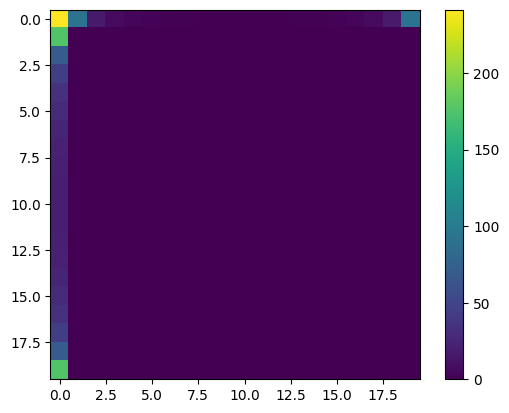

In [26]:

plt.imshow((np.abs((FS)))) #np.fft.fftshift #np.log
plt.colorbar()
plt.show()

In [27]:
from PIL import Image
import skimage as ski
import matplotlib.pyplot as plt
import scipy.misc
import cv2

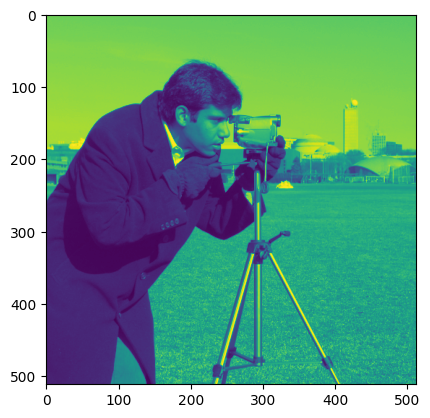

In [28]:
import skimage as ski
im = ski.data.camera()
plt.imshow(im)

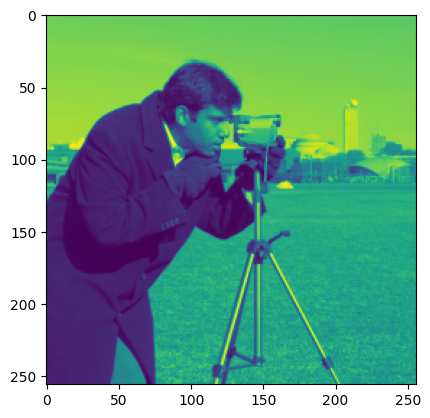

In [30]:
#im.shape
dim = 256
crop = np.zeros((dim, dim))
#crop = 
im_r = ski.transform.resize(im, (dim, dim))
plt.imshow(im_r)

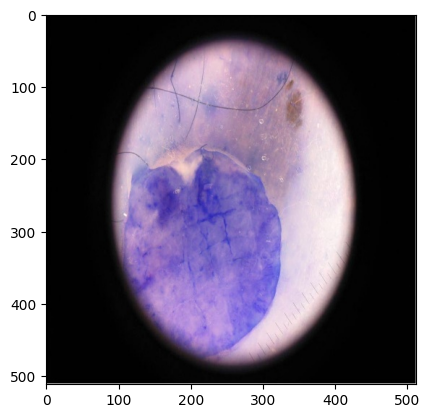

In [31]:
img = Image.open('ISIC_0000004_cancer.jpg')
plt.imshow(img)
#img = iio.v2.imread('ISIC_0000004_cancer.jpg')
#x_true = Image.rgb2gray(img)
#x_true3 = np.array( img.resize((self.Nx, self.Ny)))

In [32]:
def shepp_logan_params():
  return [
  (1.0, 0.0, 0.0, 0.69, 0.92, 0),
  (-0.8, 0.0, -0.0184, 0.6624, 0.8740, 0),
  (-0.2, 0.22, 0.0, 0.11, 0.31, -18),
  (-0.2, -0.22, 0.0, 0.16, 0.41, 18),
  (0.1, 0.0, 0.35, 0.21, 0.25, 0),
  (0.1, 0.0, -0.35, 0.046, 0.046, 0),
  (0.1, 0.0, 0.1, 0.046, 0.046, 0),
  (0.1, -0.08, -0.605, 0.046, 0.023, 0),
  (0.1, 0.0, -0.606, 0.023, 0.023, 0),
  (0.1, 0.06, -0.605, 0.023, 0.046, 0),
  ]


In [33]:
def shepp_logan_phantom(x, y):
  ellipses = shepp_logan_params()
  phantom = np.zeros_like(x)
  for (A, x0, y0, a, b, phi_deg) in ellipses:
    phi = np.deg2rad(phi_deg)
    xp = (x - x0)*np.cos(phi) + (y - y0)*np.sin(phi)
    yp = -(x - x0)*np.sin(phi) + (y - y0)*np.cos(phi)
    mask = (xp**2)/(a**2) + (yp**2)/(b**2) <= 1
    phantom[mask] += A
  return phantom


In [36]:
def fourier_transform_shepp_logan_grid(KX, KY):
  """
  Compute the Fourier transform of the Shepp-Logan phantom for all points in (KX, KY) simultaneously.
  KX, KY: 2D arrays of the same shape representing the frequency grid.

  Returns:
  FT: 2D array of the same shape as KX, KY.
  """
  ellipses = shepp_logan_params()
  FT = np.zeros_like(KX, dtype=complex)

  for (A, x0, y0, a, b, phi_deg) in ellipses:
    phi = np.deg2rad(phi_deg)

    # Rotate frequencies by -phi
    # k_rot_x = KX*cos(phi) + KY*sin(phi)
    # k_rot_y = -KX*sin(phi) + KY*cos(phi)
    cosphi = np.cos(phi)
    sinphi = np.sin(phi)
    k_rot_x = KX*cosphi + KY*sinphi
    k_rot_y = -KX*sinphi + KY*cosphi

    # Compute q_norm = sqrt((a*k_rot_x)^2 + (b*k_rot_y)^2)
    q_norm = np.sqrt((a*k_rot_x)**2 + (b*k_rot_y)**2)

    # Compute the ellipse Fourier transform:
    # val = (a*b)*2*pi * J1(q_norm)/q_norm, with q_norm=0 handled
    # For q_norm=0 (center), J1(0) ~ 0, limit val-> pi*a*b
    val = np.zeros_like(q_norm, dtype=complex)

    # Avoid division by zero:
    zero_mask = (q_norm == 0)
    nonzero_mask = ~zero_mask

    # For nonzero q_norm:
    val[nonzero_mask] = (a*b)*2*np.pi * j1(q_norm[nonzero_mask]) / q_norm[nonzero_mask]

    # For q_norm=0:
    val[zero_mask] = np.pi*a*b

    # Add the phase factor e^{-i (KX*x0 + KY*y0)}
    phase = np.exp(-1j*(KX*x0 + KY*y0))

    # Accumulate into FT:
    FT += A * val * phase

  return FT



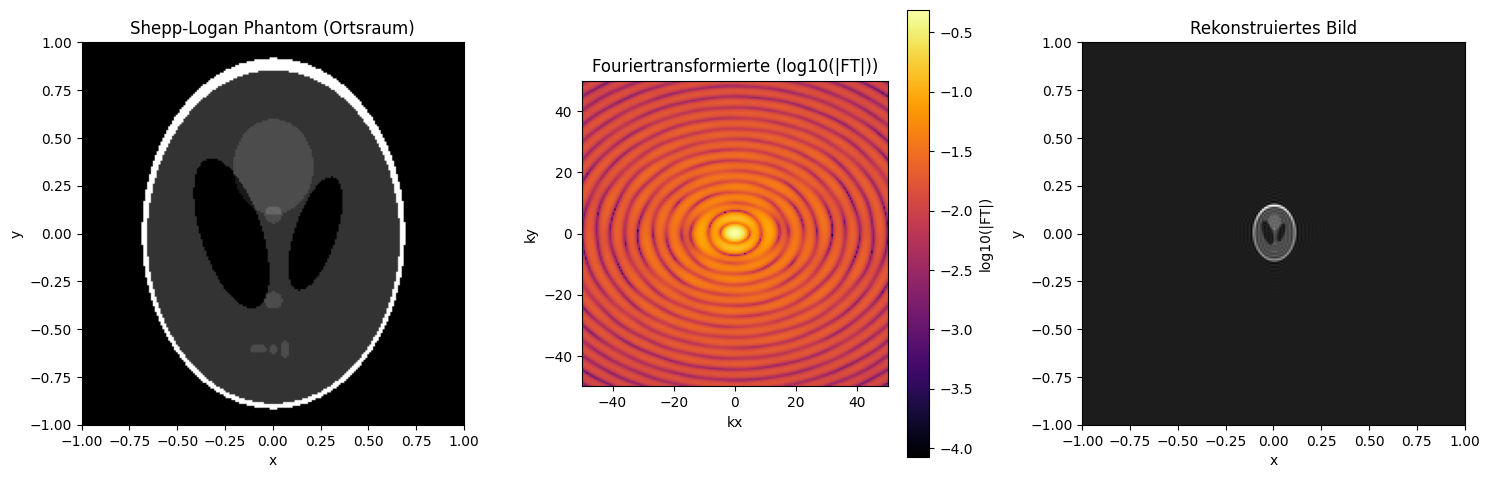

In [37]:
if __name__ == "__main__":
  # Ortsraum
  N = 200
  x = np.linspace(-1, 1, N)
  y = np.linspace(-1, 1, N)
  X, Y = np.meshgrid(x, y)
  phantom = shepp_logan_phantom(X, Y)

  # Frequenzraum
  K = 200
  kmax = 50.0
  kx = np.linspace(-kmax, kmax, K)
  ky = np.linspace(-kmax, kmax, K)
  KX, KY = np.meshgrid(kx, ky)

  # Viertransformierte mit Vektorisierung
  FT = fourier_transform_shepp_logan_grid(KX, KY)

  # Logplot
  FT_abs = np.abs(FT)
  epsilon = 1e-10
  FT_log = np.log10(FT_abs + epsilon)

  # Inverse Transformation
  delta_k = (2*kmax)/K
  FT_shifted = ifftshift(FT)
  f_rec = ifft2(FT_shifted)
  f_rec = f_rec * (delta_k**2) / ((2*np.pi)**2)
  f_rec_shifted = fftshift(f_rec)

  # Plotten
  fig, ax = plt.subplots(1,3,figsize=(15,5))

  ax[0].imshow(phantom, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray', origin='lower')
  ax[0].set_title("Shepp-Logan Phantom (Ortsraum)")
  ax[0].set_xlabel("x")
  ax[0].set_ylabel("y")

  im = ax[1].imshow(FT_log, extent=[kx[0], kx[-1], ky[0], ky[-1]], cmap='inferno', origin='lower')
  ax[1].set_title("Fouriertransformierte (log10(|FT|))")
  ax[1].set_xlabel("kx")
  ax[1].set_ylabel("ky")
  plt.colorbar(im, ax=ax[1], label='log10(|FT|)')

  ax[2].imshow(np.real(f_rec_shifted), extent=[x[0], x[-1], y[0], y[-1]], cmap='gray', origin='lower')
  ax[2].set_title("Rekonstruiertes Bild")
  ax[2].set_xlabel("x")
  ax[2].set_ylabel("y")

  plt.tight_layout()
  plt.show()